In [ ]:
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select your products.csv

Saving combined_stock_features.csv to combined_stock_features.csv


In [ ]:
import pandas as pd
import io

# Read the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['combined_stock_features.csv']))
print(df)

# Or if you just want to save it first:
with open('combined_stock_features.csv', 'wb') as f:
    f.write(uploaded['combined_stock_features.csv'])

df = pd.read_csv('combined_stock_features.csv')
print(df)

             Date       Close        High         Low        Open  \
0      2023-01-03  123.632523  129.395510  122.742865  128.782641   
1      2023-01-04  124.907700  127.181268  123.642412  125.431607   
2      2023-01-05  123.583107  126.301500  123.326101  125.668857   
3      2023-01-06  128.130203  128.792501  123.454572  124.561702   
4      2023-01-09  128.654144  131.876686  128.397138  128.970474   
...           ...         ...         ...         ...         ...   
49191  2024-12-24  105.456718  106.239716  104.762920  105.575650   
49192  2024-12-26  105.545921  106.081135  105.000802  105.575654   
49193  2024-12-27  105.536011  107.032618  104.832299  105.357606   
49194  2024-12-30  104.822395  105.615298  104.574612  105.357609   
49195  2024-12-31  106.616348  106.943424  104.842216  105.228758   

            Volume        MA10        MA50       MA100       MA200        RSI  \
0      112117500.0  128.989240  141.020708  146.761524  149.348865  22.617030   
1       8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create a mapping for Ticker and Sector
ticker_to_id = {ticker: idx for idx, ticker in enumerate(df['Ticker'].unique())}
sector_to_id = {sector: idx for idx, sector in enumerate(df['Sector'].unique())}

# Add Ticker_ID and Sector_ID columns
df['Ticker_ID'] = df['Ticker'].map(ticker_to_id)
df['Sector_ID'] = df['Sector'].map(sector_to_id)


In [ ]:
ticker_to_id

{'AAPL': 0,
 'ABBV': 1,
 'ABT': 2,
 'ACN': 3,
 'ADBE': 4,
 'AIG': 5,
 'AMGN': 6,
 'AMT': 7,
 'AMZN': 8,
 'AVGO': 9,
 'AXP': 10,
 'BA': 11,
 'BAC': 12,
 'BK': 13,
 'BKNG': 14,
 'BLK': 15,
 'BMY': 16,
 'C': 17,
 'CAT': 18,
 'CHTR': 19,
 'CL': 20,
 'CMCSA': 21,
 'COF': 22,
 'COP': 23,
 'COST': 24,
 'CRM': 25,
 'CSCO': 26,
 'CVS': 27,
 'CVX': 28,
 'DHR': 29,
 'DIS': 30,
 'DOW': 31,
 'DUK': 32,
 'EMR': 33,
 'EXC': 34,
 'F': 35,
 'FDX': 36,
 'GD': 37,
 'GE': 38,
 'GILD': 39,
 'GM': 40,
 'GOOG': 41,
 'GS': 42,
 'HD': 43,
 'HON': 44,
 'IBM': 45,
 'INTC': 46,
 'INTU': 47,
 'JNJ': 48,
 'JPM': 49,
 'KHC': 50,
 'KO': 51,
 'LIN': 52,
 'LLY': 53,
 'LMT': 54,
 'LOW': 55,
 'MA': 56,
 'MCD': 57,
 'MDLZ': 58,
 'MDT': 59,
 'MET': 60,
 'META': 61,
 'MMM': 62,
 'MO': 63,
 'MRK': 64,
 'MS': 65,
 'MSFT': 66,
 'NEE': 67,
 'NFLX': 68,
 'NKE': 69,
 'NVDA': 70,
 'ORCL': 71,
 'PEP': 72,
 'PFE': 73,
 'PG': 74,
 'PM': 75,
 'PYPL': 76,
 'QCOM': 77,
 'RTX': 78,
 'SBUX': 79,
 'SO': 80,
 'SPG': 81,
 'T': 82,
 'TGT': 83

In [ ]:
sector_to_id

{'Technology': 0,
 'Healthcare': 1,
 'Financial Services': 2,
 'Physical Assets & Resources': 3,
 'Consumer Cyclical': 4,
 'Industrials': 5,
 'Communication Services': 6,
 'Consumer Defensive': 7}

In [ ]:
# Select features and target
features = ['Close', 'MA100', 'RSI', 'Norm_Volume', 'Bollinger_Upper', 'Bollinger_Lower', 'Log_Returns', 'Ticker_ID', 'Sector_ID']
data = df[features]  # Keep only selected features


In [ ]:
data['Sector_ID'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
def min_max_scaling(data):
    """Scale data to [0, 1] range and return scaled data + min/max values"""
    min_val = np.min(data)
    max_val = np.max(data)
    # Handle case where all values are identical (avoid division by zero)
    if max_val == min_val:
        return np.zeros_like(data), min_val, max_val
    return (data - min_val) / (max_val - min_val), min_val, max_val

In [ ]:
def scale_features(df):
    scaled_data = {}
    scalers = {}

    for col in df.columns:
        if col in ['Ticker_ID', 'Sector_ID']:  # Don't scale these columns
            scaled_data[col] = df[col].values
            continue

        scaled_values, min_val, max_val = min_max_scaling(df[col].values)
        if col == 'Log_Returns':
            scalers['target'] = (min_val, max_val)
        else:
            scalers[col] = (min_val, max_val)

        scaled_data[col] = scaled_values

    return pd.DataFrame(scaled_data), scalers

# Scale all features
scaled_data, scalers = scale_features(data)

# Split into train/test (keeping temporal order)
split_ratio = 0.8
split_index = int(len(scaled_data) * split_ratio)
train_data = scaled_data.iloc[:split_index]
test_data = scaled_data.iloc[split_index:]


In [ ]:
print(train_data.columns)
print(test_data.columns)

Index(['Close', 'MA100', 'RSI', 'Norm_Volume', 'Bollinger_Upper',
       'Bollinger_Lower', 'Log_Returns', 'Ticker_ID', 'Sector_ID'],
      dtype='object')
Index(['Close', 'MA100', 'RSI', 'Norm_Volume', 'Bollinger_Upper',
       'Bollinger_Lower', 'Log_Returns', 'Ticker_ID', 'Sector_ID'],
      dtype='object')


In [ ]:
# Create ticker mapping and ticker IDs
unique_tickers = list(set(train_data['Ticker_ID'].values) | set(test_data['Ticker_ID'].values))
ticker_mapping = {ticker: idx for idx, ticker in enumerate(unique_tickers)}

unique_sectors = list(set(train_data['Sector_ID'].values) | set(test_data['Sector_ID'].values))
sector_mapping = {sector_id: sector_id for sector_id in unique_sectors}

train_ticker_ids = train_data['Ticker_ID'].values
test_ticker_ids = test_data['Ticker_ID'].values

In [ ]:
# Create sequences function for sector-wise training
def create_sequences_multi(data, ticker_ids, sector_ids, seq_length=50, target_col='Log_Returns'):
    """Create sequences from multiple features (without including Ticker_ID) for sector-wise training"""
    X, y, ticker_seq_list, sector_seq_list = [], [], [], []
    data_values = data.drop(['Ticker_ID', 'Sector_ID'], axis=1).values  # Drop 'Ticker_ID' and 'Sector_ID' from features

    for sector_id in np.unique(sector_ids):
        sector_data = data[data['Sector_ID'] == sector_id]
        sector_ticker_ids = sector_data['Ticker_ID'].values

        for ticker_id in np.unique(sector_ticker_ids):
            ticker_data = sector_data[sector_data['Ticker_ID'] == ticker_id]
            features = ticker_data.drop(['Log_Returns', 'Ticker_ID', 'Sector_ID'], axis=1).values
            targets = ticker_data['Log_Returns'].values

            for i in range(len(features) - seq_length):
                X.append(features[i:i+seq_length, :])  # Selecting only the features
                ticker_seq_list.append(ticker_id)
                sector_seq_list.append(sector_id)  # Include the sector_id in the sequence
                y.append(targets[i + seq_length])

    return np.array(X), np.array(y), np.array(ticker_seq_list), np.array(sector_seq_list)


# Create sequences for train and test data sector-wise
seq_length=50
X_train, y_train, train_tickers, train_sectors = create_sequences_multi(train_data, train_ticker_ids, train_data['Sector_ID'].values, seq_length=50)
X_test, y_test, test_tickers, test_sectors = create_sequences_multi(test_data, test_ticker_ids, test_data['Sector_ID'].values, seq_length=50)

# Check shapes
print(f"Training shapes - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test shapes - X: {X_test.shape}, y: {y_test.shape}")


Training shapes - X: (35406, 50, 6), y: (35406,)
Test shapes - X: (8840, 50, 6), y: (8840,)


In [ ]:
class LSTM:
    def __init__(self, input_dim, hidden_dim, output_dim, ticker_dim, embedding_dim, sector_dim, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lr = learning_rate
        self.ticker_dim = ticker_dim
        self.embedding_dim = embedding_dim
        self.sector_dim = sector_dim  # Number of sectors
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 1  # Time step for Adam

        # Combined input size: hidden + input + ticker + sector embedding
        concat_dim = hidden_dim + input_dim + embedding_dim + sector_dim

        # Initialize weights
        self.Wf = np.random.randn(hidden_dim, concat_dim) * 0.01
        self.bf = np.zeros((hidden_dim, 1))

        self.Wi = np.random.randn(hidden_dim, concat_dim) * 0.01
        self.bi = np.zeros((hidden_dim, 1))

        self.Wc = np.random.randn(hidden_dim, concat_dim) * 0.01
        self.bc = np.zeros((hidden_dim, 1))

        self.Wo = np.random.randn(hidden_dim, concat_dim) * 0.01
        self.bo = np.zeros((hidden_dim, 1))

        # Output layer
        self.Wy = np.random.randn(output_dim, hidden_dim) * 0.01
        self.by = np.zeros((output_dim, 1))

        # Initialize embedding matrices
        self.ticker_embedding = np.random.randn(self.ticker_dim, self.embedding_dim) * 0.01
        self.sector_embedding = np.random.randn(self.sector_dim, self.embedding_dim) * 0.01

        # Initialize Adam moment estimates
        self._init_adam_params()

    def _init_adam_params(self):
        self.m = {}
        self.v = {}
        for param_name in ['Wf', 'Wi', 'Wc', 'Wo', 'Wy', 'bf', 'bi', 'bc', 'bo', 'by']:
            param = getattr(self, param_name)
            self.m[param_name] = np.zeros_like(param)
            self.v[param_name] = np.zeros_like(param)

    def get_ticker_embedding(self, ticker_id):
        """Return the embedding for the ticker ID"""
        return self.ticker_embedding[ticker_id].reshape(-1, 1)

    def get_sector_embedding(self, sector_id):
        """Return the embedding for the sector ID"""
        return self.sector_embedding[sector_id].reshape(-1, 1)

    def sigmoid(self, x): return 1 / (1 + np.exp(-x))
    def dsigmoid(self, x): return x * (1 - x)
    def tanh(self, x): return np.tanh(x)
    def dtanh(self, x): return 1 - x ** 2

    def forward(self, x_seq, ticker_id, sector_id, h=None, c=None):
        if h is None:
            h = np.zeros((self.hidden_dim, 1))
        if c is None:
            c = np.zeros((self.hidden_dim, 1))
        self.caches = []

        # Get the ticker and sector embeddings once per sequence (not per timestep)
        ticker_embedding = self.get_ticker_embedding(ticker_id).reshape(-1, 1)
        sector_embedding = self.get_sector_embedding(sector_id).reshape(-1, 1)

        for x in x_seq:
            x = x.reshape(self.input_dim, 1)

            # Concatenate previous hidden state, input, ticker embedding, and sector embedding
            concat = np.vstack((h, x, ticker_embedding, sector_embedding))

            ft = self.sigmoid(np.dot(self.Wf, concat) + self.bf)
            it = self.sigmoid(np.dot(self.Wi, concat) + self.bi)
            c_tilde = self.tanh(np.dot(self.Wc, concat) + self.bc)
            c = ft * c + it * c_tilde
            ot = self.sigmoid(np.dot(self.Wo, concat) + self.bo)
            h = ot * self.tanh(c)

            self.caches.append((h, c, ft, it, c_tilde, ot, concat))

        y_hat = np.dot(self.Wy, h) + self.by
        return y_hat, h, c

    def backward(self, x_seq, y_hat, y_true):
        dh_next = np.zeros((self.hidden_dim, 1))
        dc_next = np.zeros((self.hidden_dim, 1))

        grads = {
            'Wf': np.zeros_like(self.Wf), 'Wi': np.zeros_like(self.Wi),
            'Wc': np.zeros_like(self.Wc), 'Wo': np.zeros_like(self.Wo),
            'Wy': np.zeros_like(self.Wy),
            'bf': np.zeros_like(self.bf), 'bi': np.zeros_like(self.bi),
            'bc': np.zeros_like(self.bc), 'bo': np.zeros_like(self.bo),
            'by': np.zeros_like(self.by)
        }

        dy = y_hat - y_true
        grads['Wy'] += np.dot(dy, self.caches[-1][0].T)
        grads['by'] += dy

        dh = np.dot(self.Wy.T, dy) + dh_next

        for t in reversed(range(len(x_seq))):
            h, c, ft, it, c_tilde, ot, concat = self.caches[t]
            c_prev = self.caches[t - 1][1] if t > 0 else np.zeros_like(c)

            do = dh * self.tanh(c)
            do_raw = do * self.dsigmoid(ot)

            dc = dh * ot * self.dtanh(self.tanh(c)) + dc_next
            dc_tilde = dc * it
            dc_tilde_raw = dc_tilde * self.dtanh(c_tilde)

            di = dc * c_tilde
            di_raw = di * self.dsigmoid(it)

            df = dc * c_prev
            df_raw = df * self.dsigmoid(ft)

            grads['Wf'] += np.dot(df_raw, concat.T)
            grads['Wi'] += np.dot(di_raw, concat.T)
            grads['Wc'] += np.dot(dc_tilde_raw, concat.T)
            grads['Wo'] += np.dot(do_raw, concat.T)

            grads['bf'] += df_raw
            grads['bi'] += di_raw
            grads['bc'] += dc_tilde_raw
            grads['bo'] += do_raw

            dconcat = (np.dot(self.Wf.T, df_raw) +
                       np.dot(self.Wi.T, di_raw) +
                       np.dot(self.Wc.T, dc_tilde_raw) +
                       np.dot(self.Wo.T, do_raw))

            dh = dconcat[:self.hidden_dim, :]
            dc_next = dc * ft

        self._apply_adam(grads)
        self.t += 1  # Increment timestep

    def _apply_adam(self, grads):
        for param_name in grads:
            grad = grads[param_name]
            self.m[param_name] = self.beta1 * self.m[param_name] + (1 - self.beta1) * grad
            self.v[param_name] = self.beta2 * self.v[param_name] + (1 - self.beta2) * (grad ** 2)

            m_hat = self.m[param_name] / (1 - self.beta1 ** self.t)
            v_hat = self.v[param_name] / (1 - self.beta2 ** self.t)

            param = getattr(self, param_name)
            param -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            setattr(self, param_name, param)


    def train(self, X_train, y_train, ticker_ids_train, sector_ids_train, epochs=10, batch_size=32):
        for epoch in range(epochs):
            total_loss = 0
            indices = np.arange(len(X_train))
            np.random.shuffle(indices)

            for i in range(0, len(X_train), batch_size):
                batch_indices = indices[i:i + batch_size]
                batch_loss = 0
                batch_grads = []

                for j in batch_indices:
                    x_seq = X_train[j]
                    y_true = y_train[j].reshape(self.output_dim, 1)
                    ticker_ids = ticker_ids_train[j]
                    sector_ids = sector_ids_train[j]
                    y_hat, _, _ = self.forward(x_seq, ticker_ids, sector_ids)
                    loss = np.mean((y_hat - y_true) ** 2)
                    batch_loss += loss

                    self.backward(x_seq, y_hat, y_true)

                total_loss += batch_loss

            print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.6f}")



In [ ]:
# Print the sector to ID mapping
print(sector_to_id)


{'Technology': 0, 'Healthcare': 1, 'Financial Services': 2, 'Physical Assets & Resources': 3, 'Consumer Cyclical': 4, 'Industrials': 5, 'Communication Services': 6, 'Consumer Defensive': 7}


In [ ]:
sector_mapping = {
    0: "Technology",
    1: "Healthcare",
    2: "Financial Services",
    3: "Physical Assets & Resources",
    4: "Consumer Cyclical",
    5: "Industrials",
    6: "Communication Services",
    7: "Consumer Defensive"
}


In [ ]:
def train_lstm_sectorwise(X_train, y_train, train_tickers, train_sectors, sector_id, params, sector_models=None):
    if sector_models is None:
        sector_models = {}

    # Select data for the given sector
    sector_indices = np.where(train_sectors == sector_id)[0]

    if len(sector_indices) == 0:
        print(f"No training data for sector {sector_id}. Skipping.")
        return sector_models

    X_sector = X_train[sector_indices]
    y_sector = y_train[sector_indices]
    ticker_sector = train_tickers[sector_indices]
    sector_sector = train_sectors[sector_indices]

    # Get sector name for printing
    sector_name = sector_mapping.get(sector_id, f"Sector {sector_id}")

    # Check if model for sector already exists (for fine-tuning)
    if sector_id in sector_models:
        model = sector_models[sector_id]
        print(f"\nFine-tuning sector {sector_name}...")
    else:
        model = LSTM(
            input_dim=params['input_dim'],
            hidden_dim=params['hidden_dim'],
            output_dim=params['output_dim'],
            ticker_dim=params['ticker_dim'],
            embedding_dim=params['embedding_dim'],
            sector_dim=params['sector_dim'],
            learning_rate=params['learning_rate']
        )
        print(f"\nTraining {sector_name} sector from scratch...")

    # Train
    model.train(X_sector, y_sector, ticker_sector, sector_sector, epochs=params['epochs'], batch_size=params['batch_size'])

    # Save the model
    sector_models[sector_id] = model

    return sector_models


In [ ]:
# Initialize empty models
sector_models = {}

In [ ]:
def predict_logreturns(sector_model, X_test, test_tickers, sector_id, scalers):
    """
    Predict log returns for all stocks in the given sector.
    """
    predictions = []

    for i in range(len(X_test)):
        x_seq = X_test[i]
        ticker_id = test_tickers[i]

        # Reinitialize hidden and cell states
        h_prev = np.zeros((sector_model.hidden_dim, 1))
        c_prev = np.zeros((sector_model.hidden_dim, 1))

        # Get the prediction for this sequence
        y_pred, _, _ = sector_model.forward(x_seq, ticker_id, sector_id, h_prev, c_prev)
        predictions.append(y_pred.flatten()[0])

    # Inverse scale the predictions (log returns)
    min_target, max_target = scalers['target']
    predictions = np.array(predictions) * (max_target - min_target) + min_target

    return predictions


In [ ]:
def calculate_volatility(log_returns, window_size=10):
    """
    Calculate volatility (standard deviation) of log returns for a given window size.
    """
    volatility = []
    for i in range(len(log_returns)):
        start = max(0, i - window_size + 1)
        window = log_returns[start:i+1]
        volatility.append(np.std(window))  # Standard deviation as volatility
    return np.array(volatility)


In [ ]:
import os
def save_predictions_to_csv(sector_id, log_returns, volatility, test_tickers, output_filename, ticker_mapping, sector_mapping):
    """
    Save log returns and volatility to a CSV file for a specific sector with stock and sector names.
    """

    id_to_ticker = {v: k for k, v in ticker_to_id.items()}

    # Map ticker_ids to actual ticker names using ticker_mapping
    ticker_names = [id_to_ticker[ticker_id] for ticker_id in test_tickers]

    # Map sector_id to sector name using sector_mapping
    sector_name = sector_mapping.get(sector_id, "Unknown Sector")

    # Create DataFrame to store predictions
    df = pd.DataFrame({
        'Stock': ticker_names,
        'Log_Returns': log_returns,
        'Volatility': volatility,
        'Sector': [sector_name] * len(test_tickers)  # Add the sector name instead of sector_id
    })

    # Check if the file already exists to determine if headers should be written
    file_exists = os.path.exists(output_filename)

    # Append to the CSV file (with headers only if the file doesn't exist)
    df.to_csv(output_filename, index=False, mode='a', header=not file_exists)  # Only write header if the file doesn't exist

    print(f"Results for sector '{sector_name}' saved to {output_filename}")

In [ ]:
from datetime import timedelta
import matplotlib.pyplot as plt

def walk_forward_validation(data_df, sector_id, params, start_date, end_date, train_window_days=365, test_window_days=30):
    """
    Perform walk-forward validation on sector-specific data.

    Parameters:
        data_df: DataFrame with columns ['Date', 'X', 'y', 'ticker_id', 'sector_id']
        sector_id: Sector ID (e.g., 0 for Technology)
        params: Model parameters dictionary
        start_date: Start of the walk-forward validation window (string or datetime)
        end_date: End of the walk-forward validation window (string or datetime)
        train_window_days: Size of training window in days
        test_window_days: Size of testing window in days
    """
    # Convert dates
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)

    current_date = start
    walk_id = 0

    all_walk_preds = []
    all_walk_truths = []
    all_walk_dates = []

    while current_date + timedelta(days=train_window_days + test_window_days) <= end:
        train_start = current_date
        train_end = train_start + timedelta(days=train_window_days)
        test_start = train_end
        test_end = test_start + timedelta(days=test_window_days)

        print(f"\n=== Walk {walk_id}: {train_start.date()} to {test_end.date()} ===")

        # Filter training data
        train_data = data_df[(data_df['Date'] >= train_start) & (data_df['Date'] < train_end) & (data_df['sector_id'] == sector_id)]
        test_data = data_df[(data_df['Date'] >= test_start) & (data_df['Date'] < test_end) & (data_df['sector_id'] == sector_id)]

        if len(train_data) == 0 or len(test_data) == 0:
            print("Skipping due to lack of data.")
            current_date += timedelta(days=test_window_days)
            continue

        # Convert to arrays
        X_train = np.stack(train_data['X'].values)
        y_train = np.stack(train_data['y'].values)
        train_tickers = train_data['ticker_id'].values
        train_sectors = train_data['sector_id'].values

        X_test = np.stack(test_data['X'].values)
        y_test = np.stack(test_data['y'].values)
        test_tickers = test_data['ticker_id'].values

        # Train model on current window
        sector_models = train_lstm_sectorwise(X_train, y_train, train_tickers, train_sectors, sector_id, params)

        # Predict
        log_returns = predict_logreturns(sector_models[sector_id], X_test, test_tickers, sector_id, scalers)

        # Inverse scale the true values (y_test) and predictions
        min_target, max_target = scalers['target']
        y_test_true = y_test * (max_target - min_target) + min_target
        y_pred = np.array(log_returns)

        # Manually calculate errors
        abs_errors = np.abs(y_test_true - y_pred)
        squared_errors = (y_test_true - y_pred) ** 2

        mae = np.mean(abs_errors)
        mse = np.mean(squared_errors)
        rmse = np.sqrt(mse)

        print(f"Walk {walk_id} - MAE: {mae:.5f}, RMSE: {rmse:.5f}, MSE: {mse:.5f}")

        # Volatility
        volatility = calculate_volatility(log_returns)

        # Save predictions
        output_filename = f'technology_sector_predictions_walk{walk_id}.csv'
        save_predictions_to_csv(sector_id, log_returns, volatility, test_tickers, output_filename, ticker_mapping, sector_mapping)

        # Store for multi-walk plotting
        all_walk_preds.extend(y_pred)
        all_walk_truths.extend(y_test_true)
        all_walk_dates.extend(test_data['Date'].values)

        # Advance window
        current_date += timedelta(days=test_window_days)
        walk_id += 1

    # Plot all predictions vs actuals
    if all_walk_preds and all_walk_truths:
        plt.figure(figsize=(14, 6))
        plt.plot(all_walk_dates, all_walk_truths, label="Actual Log Returns", color='black', linewidth=2)
        plt.plot(all_walk_dates, all_walk_preds, label="Predicted Log Returns", linestyle='--', color='blue')
        plt.xlabel("Date")
        plt.ylabel("Log Returns")
        plt.title(f"Technology Sector: Actual vs Predicted Log Returns Across All Walks")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
def run_sector_evaluation(sector_id, sector_name, X_train, y_train, train_tickers, train_sectors, scaler_dict, ticker_mapping, sector_mapping, df, params):
    """
    Run end-to-end training, prediction, and walk-forward validation for a specific sector.
    """

    # Reverse mapping properly
    id_to_ticker = {v: k for k, v in ticker_to_id.items()}  # use ticker_to_id

    # Filter tickers belonging to Health sector
    sector_tickers_ids = [ticker_id for ticker_id, s_id in zip(train_tickers, train_sectors) if s_id==sector_id]

    # Get stock names correctly
    sector_stock_names = [id_to_ticker[int(ticker_id)] for ticker_id in set(sector_tickers_ids)]

    print("Stocks being trained in health sector:")
    print(sector_stock_names)

    # Extract start and end dates
    start_date = df['Date'].min()
    end_date = df['Date'].max()

    # Combine data
    combined_df = pd.DataFrame({
        'Date': pd.to_datetime(df['Date'].iloc[:len(X_train)]),
        'X': list(X_train),
        'y': y_train.flatten(),
        'ticker_id': train_tickers,
        'sector_id': train_sectors
    }).sort_values(by='Date').reset_index(drop=True)

    # Call existing validation function
    walk_forward_validation(
        data_df=combined_df,
        sector_id=sector_id,
        params=params,
        start_date=start_date,
        end_date=end_date,
        train_window_days=365,
        test_window_days=30
    )


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- TECHNOLOGY -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 5,
    'batch_size': 32
}

Stocks being trained in health sector:
['AAPL', 'MSFT', 'ACN', 'ADBE', 'NVDA', 'ORCL', 'AVGO', 'IBM', 'INTC', 'INTU', 'QCOM', 'CRM', 'CSCO']

=== Walk 0: 2023-01-03 to 2024-02-02 ===

Training Technology sector from scratch...
Epoch 1/5, Loss: 16.592478
Epoch 2/5, Loss: 6.118938
Epoch 3/5, Loss: 5.898695
Epoch 4/5, Loss: 5.663927
Epoch 5/5, Loss: 5.485746
Walk 0 - MAE: 0.01454, RMSE: 0.02016, MSE: 0.00041
Results for sector 'Technology' saved to technology_sector_predictions_walk0.csv

=== Walk 1: 2023-02-02 to 2024-03-03 ===

Training Technology sector from scratch...
Epoch 1/5, Loss: 15.516598
Epoch 2/5, Loss: 6.093641
Epoch 3/5, Loss: 5.963826
Epoch 4/5, Loss: 5.606761
Epoch 5/5, Loss: 5.540456
Walk 1 - MAE: 0.01520, RMSE: 0.02547, MSE: 0.00065
Results for sector 'Technology' saved to technology_sector_predictions_walk1.csv

=== Walk 2: 2023-03-04 to 2024-04-02 ===

Training Technology sector from scratch...
Epoch 1/5, Loss: 16.151344
Epoch 2/5, Loss: 6.453126
Epoch 3/5, Loss: 6.119

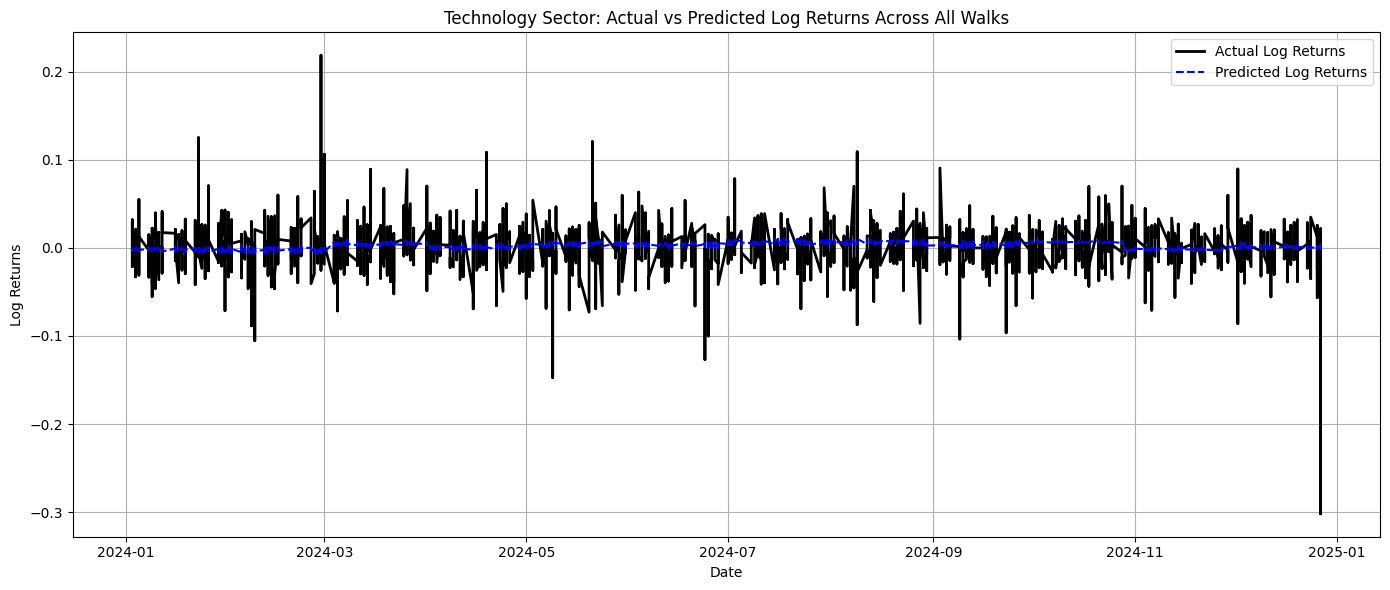

In [ ]:
run_sector_evaluation(
    sector_id=0,
    sector_name="Technology",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- HEALTHCARE -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 5,
    'batch_size': 32
}

Stocks being trained in health sector:
['MRK', 'ABBV', 'ABT', 'AMGN', 'GILD', 'MDT', 'PFE', 'BMY', 'JNJ', 'LLY', 'CVS', 'DHR']

=== Walk 0: 2023-01-03 to 2024-02-02 ===

Training Healthcare sector from scratch...
Epoch 1/5, Loss: 16.673377
Epoch 2/5, Loss: 3.007118
Epoch 3/5, Loss: 2.794932
Epoch 4/5, Loss: 2.768374
Epoch 5/5, Loss: 2.630927
Walk 0 - MAE: 0.01135, RMSE: 0.01867, MSE: 0.00035
Results for sector 'Healthcare' saved to technology_sector_predictions_walk0.csv

=== Walk 1: 2023-02-02 to 2024-03-03 ===

Training Healthcare sector from scratch...
Epoch 1/5, Loss: 12.360651
Epoch 2/5, Loss: 3.292576
Epoch 3/5, Loss: 2.891488
Epoch 4/5, Loss: 2.818410
Epoch 5/5, Loss: 2.823515
Walk 1 - MAE: 0.00988, RMSE: 0.01400, MSE: 0.00020
Results for sector 'Healthcare' saved to technology_sector_predictions_walk1.csv

=== Walk 2: 2023-03-04 to 2024-04-02 ===

Training Healthcare sector from scratch...
Epoch 1/5, Loss: 11.902117
Epoch 2/5, Loss: 3.167487
Epoch 3/5, Loss: 2.887206
Epoch 4/5,

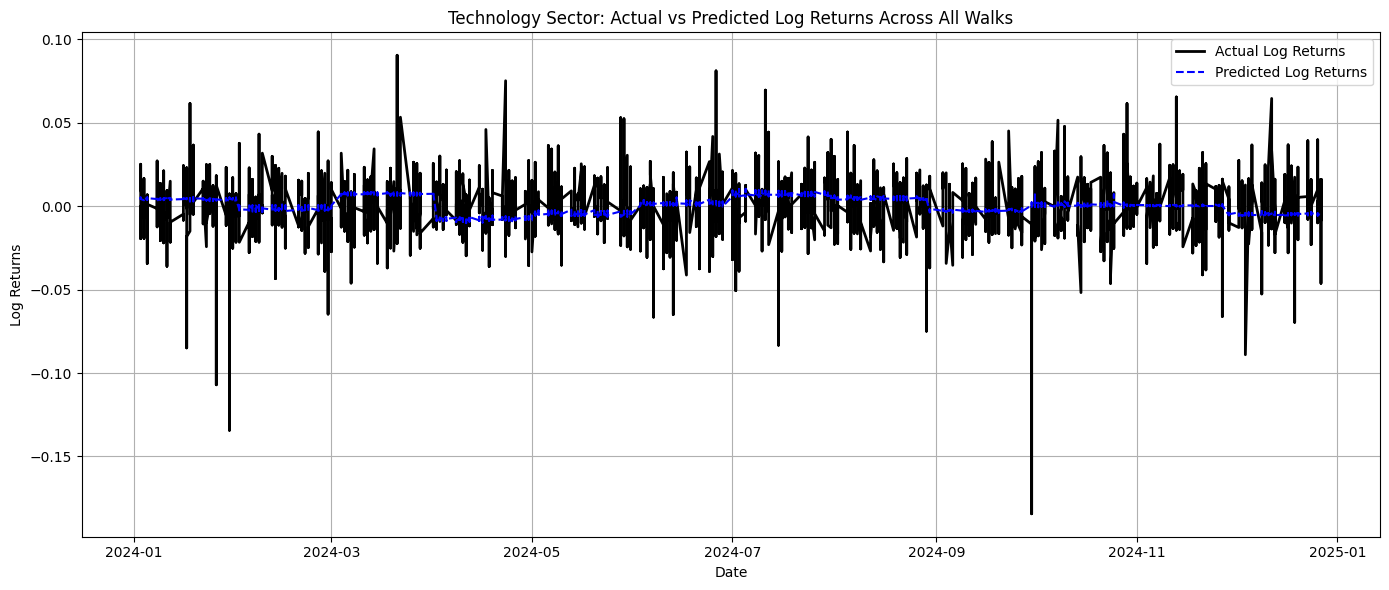

In [ ]:
run_sector_evaluation(
    sector_id=1,
    sector_name="Health",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- FINANCIAL SERVICES -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 2,
    'batch_size': 32
}

In [ ]:
run_sector_evaluation(
    sector_id=2,
    sector_name="Financial Services",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- PHYSICAL ASSETS -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 2,
    'batch_size': 32
}

In [ ]:
run_sector_evaluation(
    sector_id=3,
    sector_name="Physical Assets",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- CONSUMER CYCLIC -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 2,
    'batch_size': 32
}

In [ ]:
run_sector_evaluation(
    sector_id=4,
    sector_name="Consumer Cyclic",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- INDUSTRIALS -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 2,
    'batch_size': 32
}

In [ ]:
run_sector_evaluation(
    sector_id=5,
    sector_name="Industrial",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- COMMUNICATION SERVICES -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 2,
    'batch_size': 32
}

In [ ]:
run_sector_evaluation(
    sector_id=6,
    sector_name="Communication Services",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
#-x-x-x-x-x-x-x-x-x-x-x-x- CONSUMER DEFENCE -x-x-x-x-x-x-x-x-x-x-x-x-

In [ ]:
parameters = {
    'input_dim': X_train.shape[2],  # Number of features
    'hidden_dim': 64,
    'output_dim': 1,
    'ticker_dim': len(ticker_mapping),  # Total unique tickers
    'embedding_dim': 8,
    'sector_dim': len(sector_mapping),  # Total unique sectors
    'learning_rate': 0.001,
    'epochs': 2,
    'batch_size': 32
}

In [ ]:
run_sector_evaluation(
    sector_id=7,
    sector_name="Consumer Defence",
    X_train=X_train,
    y_train=y_train,
    train_tickers=train_tickers,
    train_sectors=train_sectors,
    scaler_dict=scalers,
    ticker_mapping=ticker_mapping,
    sector_mapping=sector_mapping,
    df=df,
    params=parameters
)


In [ ]:
# to check train-test split for each sector

In [ ]:
def print_stocks_in_sector(train_tickers, train_sectors, test_tickers, test_sectors, ticker_mapping, sector_id, sector_mapping):
    """
    Prints the unique stocks in train and test data for a given sector.
    """
    # Reverse mapping: ID -> Ticker Name
    ticker_to_id = {v: k for k, v in ticker_mapping.items()}

    # Get tickers for the sector in train and test
    train_sector_tickers = [ticker for ticker, sector in zip(train_tickers, train_sectors) if sector == sector_id]
    test_sector_tickers = [ticker for ticker, sector in zip(test_tickers, test_sectors) if sector == sector_id]

    unique_train_tickers = set(train_sector_tickers)
    unique_test_tickers = set(test_sector_tickers)

    # Map ticker IDs back to names
    train_stock_names = [id_to_ticker[ticker_id] for ticker_id in unique_train_tickers]
    test_stock_names = [id_to_ticker[ticker_id] for ticker_id in unique_test_tickers]

    sector_name = sector_mapping.get(sector_id, f"Sector {sector_id}")

    print(f"\n--- {sector_name} ---")
    print(f"Unique stocks in train data ({len(train_stock_names)} stocks): {sorted(train_stock_names)}")
    print(f"Unique stocks in test data ({len(test_stock_names)} stocks): {sorted(test_stock_names)}")


In [ ]:
# Reverse mapping properly
id_to_ticker = {v: k for k, v in ticker_to_id.items()}

# Filter tickers belonging to Technology sector (sector_id = 0)
technology_sector_tickers = [ticker_id for ticker_id, sector_id in zip(train_tickers, train_sectors) if sector_id == 0]

# Get stock names correctly
technology_stock_names = [id_to_ticker[int(ticker_id)] for ticker_id in set(technology_sector_tickers)]

print("Stocks being trained in Technology sector:")
print(technology_stock_names)

Stocks being trained in Technology sector:
['AAPL', 'MSFT', 'ACN', 'ADBE', 'NVDA', 'ORCL', 'AVGO', 'IBM', 'INTC', 'INTU', 'QCOM', 'CRM', 'CSCO']
